Exercise 3
At http://www.coindesk.com you can download the daily price of a BitCoin as a CSV file. Read this file and compute the spectrum of BitCoin prices as a function of time. Does it resemble white, pink, or Brownian noise?

閱讀此文件，併計算隨時間變化的比特幣價格範圍。它類似於白色、粉紅色或布朗的噪聲嗎？

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

引進比特幣表格。

In [2]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', 
                 parse_dates=[0])
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


ys為Closing Price (USD)全部。
ts為索引，表示0到2358。

In [3]:
ys = df['Closing Price (USD)']
ts = df.index

ys代表wave陣列。
ts代表時間的陣列。
framerate代表每秒樣本。

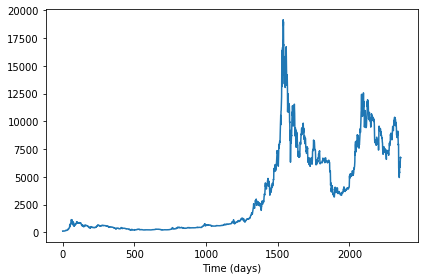

In [4]:
from thinkdsp import Wave

wave = Wave(ys, ts, framerate=1) #ys、ts沒指定範圍表示全部，framerate每秒樣本1
wave.plot() #畫圖
decorate(xlabel='Time (days)') # x軸為時間(天)

可知大約在time=1500時，有最高點。

畫出比特幣錶的spectrum，並將它變為log-log，可看出較明顯變化。

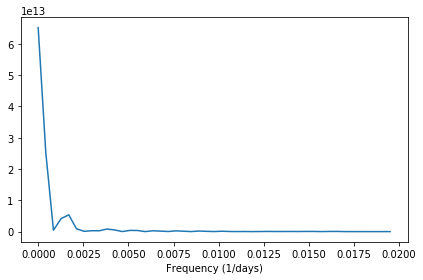

In [5]:
spectrum = wave.make_spectrum()
spectrum.plot_power(high=0.02) # 使用plot_power，表示為power
decorate(xlabel='Frequency (1/days)') # x軸為Frequency (1/days)

上圖為尚未log時的圖，可看出它幾乎集中在0~0.1間，因此我將它放大到為0~0.002間，但變化還是很難看出來。

因此將它變成log-log。

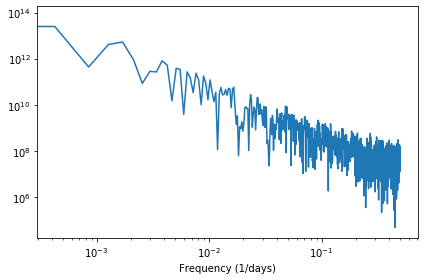

In [6]:
spectrum = wave.make_spectrum()
spectrum.plot_power() # 使用plot_power，表示為power
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (1/days)', **loglog) # x軸為Frequency (1/days)

上圖為log-log的結果，可以很明顯看出呈現遞減的狀況，10^-1附近很集中，中間有些參差不齊。

估算斜率。

In [7]:
spectrum.estimate_slope()[0]

-1.733254093675893

紅色噪聲的斜率應為-2。該PSD的斜率接近1.7，因此很難說我是否將它視為紅色噪聲(red noise)，還是說它是一種粉紅色噪聲(pink noise)。